<a href="https://colab.research.google.com/github/Anastasiya9323/machineLearning/blob/main/Lenet_mnist_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [17]:
import torchvision.datasets

In [18]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [19]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [20]:
len(y_train), len(y_test)

(60000, 10000)

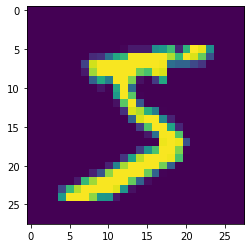

tensor(5)


In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [22]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [23]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [24]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [26]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [27]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9750)
tensor(0.9828)
tensor(0.9859)
tensor(0.9874)
tensor(0.9888)
tensor(0.9881)
tensor(0.9853)
tensor(0.9884)
tensor(0.9887)
tensor(0.9882)
tensor(0.9883)
tensor(0.9900)
tensor(0.9874)
tensor(0.9895)
tensor(0.9895)
tensor(0.9881)
tensor(0.9881)
tensor(0.9887)
tensor(0.9871)
tensor(0.9870)
tensor(0.9883)
tensor(0.9882)
tensor(0.9883)
tensor(0.9892)
tensor(0.9885)
tensor(0.9880)
tensor(0.9893)
tensor(0.9876)
tensor(0.9890)
tensor(0.9897)
tensor(0.9868)
tensor(0.9880)
tensor(0.9898)
tensor(0.9860)
tensor(0.9875)
tensor(0.9882)
tensor(0.9886)
tensor(0.9880)
tensor(0.9885)
tensor(0.9889)
tensor(0.9909)
tensor(0.9895)
tensor(0.9891)
tensor(0.9887)
tensor(0.9888)
tensor(0.9883)
tensor(0.9867)
tensor(0.9888)
tensor(0.9885)
tensor(0.9882)
tensor(0.9885)
tensor(0.9878)
tensor(0.9888)
tensor(0.9881)
tensor(0.9849)
tensor(0.9892)
tensor(0.9889)
tensor(0.9896)
tensor(0.9885)
tensor(0.9894)
tensor(0.9876)
tensor(0.9891)
tensor(0.9898)
tensor(0.9893)
tensor(0.9864)
tensor(0.9897)
tensor(0.9

KeyboardInterrupt: ignored

In [28]:
lenet5.forward(X_test)

tensor([[ -8.4771,   2.9487,   1.2002,  ...,  30.6569, -10.9733,   6.8793],
        [  4.8645,  -4.0331,  33.8957,  ...,  -6.7777,   7.0441, -10.4184],
        [-12.1069,  32.4374,  -3.2685,  ...,  -0.3493,   8.4763, -10.1774],
        ...,
        [-13.9389,  -1.9585,  -6.7393,  ...,   0.2293,   0.2443,   7.7333],
        [  1.3940, -10.7109, -10.7477,  ..., -14.8865,   7.8942,  -2.7812],
        [  2.9169,  -6.6399,   8.0756,  ..., -15.7976,   6.3267, -13.8639]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

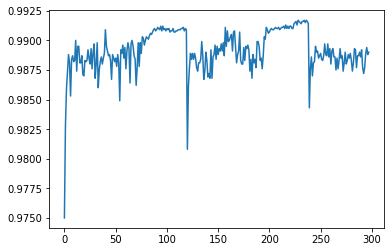

In [29]:
plt.plot(test_accuracy_history);

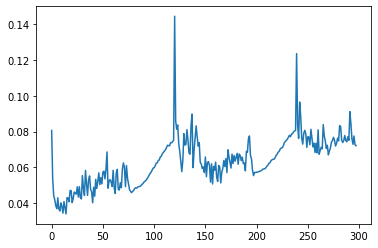

In [30]:
plt.plot(test_loss_history);